===============================================PART - 1=========================================================================

--------------------------------------------SPATIAL DOMAIN----------------------------------------------------------------------

In [17]:
#Created by RAKSHITH S NADIGER
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure, color

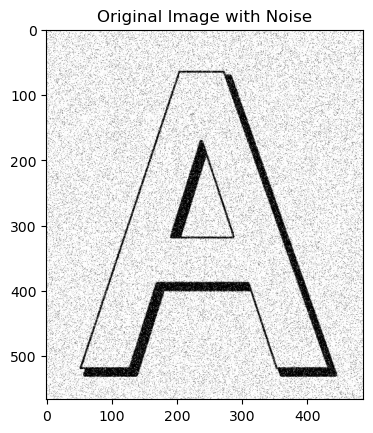

In [24]:
image1=cv2.imread('image.jpg',1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)),plt.title("Original Image with Noise")
plt.show()

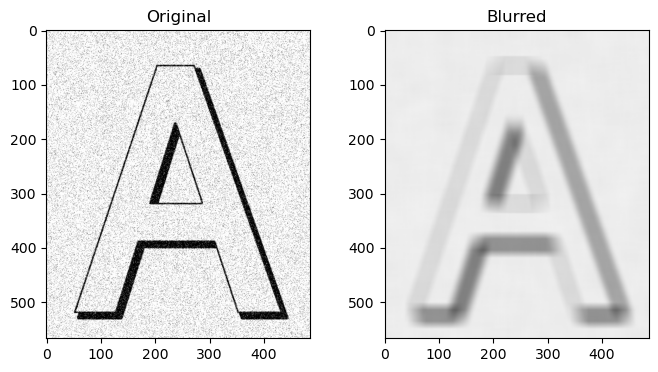

In [28]:
#SPATIAL AVERAGING FILTER
def apply_spatial_averaging_filter(image, kernel_size):
    # Create a kernel for spatial averaging
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

    # Apply the filter using OpenCV's filter2D function
    filtered_image = cv2.filter2D(image, -1, kernel)

    # Display the original and filtered images
    filtered_image = np.abs(filtered_image)
    plt.figure(figsize=(8,4))
    plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
    plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Blurred')
    plt.show()

# Apply spatial averaging filter with a kernel size of 40x40
apply_spatial_averaging_filter(image1, kernel_size=35)

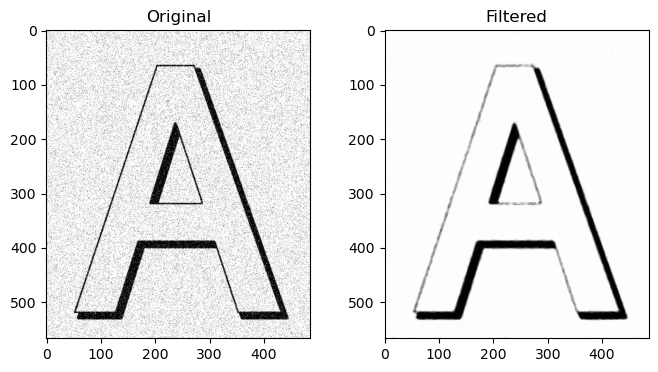

In [26]:
#Median Filter

def apply_median_filter(image):
    
    # Apply median filter
    filtered_image = cv2.medianBlur(image,7)  # Change the kernel size as needed
    
    filtered_image = np.abs(filtered_image)
    plt.figure(figsize=(8,4))
    plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
    plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Filtered')
    plt.show()
    return filtered_image


blurred_image=apply_median_filter(image1)

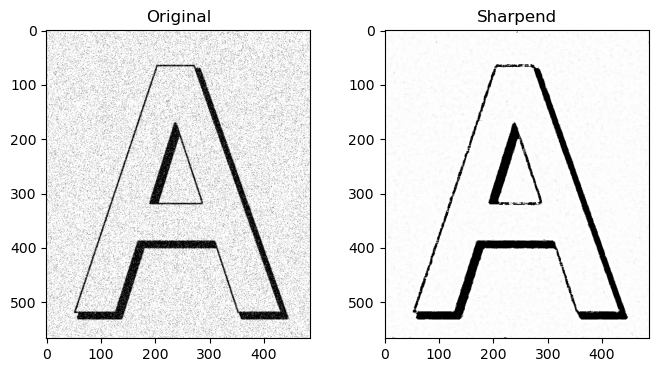

In [27]:
#Laplacian
# Define the sharpening kernel
kernel = np.array([
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 55, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1]
])

# Normalize the kernel
kernel = kernel / np.sum(kernel)

def laplacianfilter(image,imageorg,kernel):
    sharpened_image = cv2.filter2D(image, -1, kernel)
    plt.figure(figsize=(8,4))
    plt.subplot(121), plt.imshow(cv2.cvtColor(imageorg, cv2.COLOR_BGR2RGB)), plt.title('Original')
    plt.subplot(122), plt.imshow(sharpened_image, cmap='gray'), plt.title('Sharpend')
    plt.show()
    
laplacianfilter(blurred_image,image1,kernel)